<a href="https://colab.research.google.com/github/guilhermervalle/python_modulo13/blob/main/module_13_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados** 

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [199]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open('estados-bruto.xml', mode='r'), 'lxml')


In [200]:
# visualize os resultados
print(fonte)


<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [201]:
# manipule os dados
estados = []
siglas = []
regioes = []

nomes = fonte.findAll("nome")
abreviacoes = fonte.findAll("sigla")
posicoes = fonte.findAll("regiao")
for nome in nomes:
  estados.append(nome.text)
print(estados)
for sigla in abreviacoes:
  siglas.append(sigla.text)
print(siglas)
for regiao in posicoes:
  regioes.append(regiao.text)
print(regioes)


['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']
['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG']
['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']


In [202]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

import csv

with open('estados-limpo.csv', mode='w', newline='') as csv_file:
    
  fieldnames = ["Estado", "Sigla", "Região"]
  writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

  writer.writeheader()
  for i, row in enumerate(estados):
    writer.writerow({"Estado": estados[i], 'Sigla': siglas[i], 'Região': regioes[i]})




### **1.2. Cidades** 

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [205]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte_df = pd.read_csv(NOME_ARQUIVO_FONTE, sep=',', encoding='utf8')
fonte_df

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [206]:
# manipule os dados
cidades_df = fonte_df[['UF', 'nome','Pop_est_2009', 'PIB' , 'PIB_percapita']]
cidades_df

,UF,nome,Pop_est_2009,PIB,PIB_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,9737,1.876289e+05,19269.679688
5562,PARANÁ,Planalto,13983,1.385535e+05,9908.709961
5563,SÃO PAULO,Guararapes,29639,5.320191e+05,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,3067,2.198064e+04,7166.819824


In [207]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

cidades_df.to_csv(NOME_ARQUIVO_DESTINO, mode='w', encoding='utf8', sep=';', index=False)

### **1.3. Brasil** 

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [208]:
# solução do exercício 1.3
#leitura arquivo csv
estados_df = pd.read_csv('estados-bruto.csv', sep=',', encoding='iso-8859-1')

#combinando DataFrames
brasil_df = pd.merge(left= cidades_df, right= estados_df, on='UF', how= 'inner')
brasil_df

,UF,nome,Pop_est_2009,PIB,PIB_percapita,Sigla,Regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,2.355845e+04,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7893,7.499741e+04,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,9.290382e+04,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,19410,6.236689e+04,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5561,AMAPÁ,Serra do Navio,3982,1.097953e+05,27572.900391,AP,NORTE
5562,AMAPÁ,Ferreira Gomes,5475,6.993773e+04,12774.009766,AP,NORTE
5563,AMAPÁ,Tartarugalzinho,13769,1.199880e+05,8714.360352,AP,NORTE
5564,AMAPÁ,Macapá,366484,4.679694e+06,12769.160156,AP,NORTE


In [209]:
# verificando celulas NaN

def has_null(df: pd.DataFrame) -> bool:
  return df.isnull().any().any()

In [210]:
# preenchendo celulas NaN

has_null(df=brasil_df.fillna(''))


False

In [211]:
# gerando brasil.csv

brasil_df.to_csv('brasil.csv', mode='w', encoding='utf-8', sep=';', index=False)


---

## 2\. Data Analytics

### **2.1. DataFrame** 

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [212]:
# solução do exercício 2.1

import pandas as pd

brasil_df = pd.read_csv('brasil.csv', sep=';')
brasil_df

,UF,nome,Pop_est_2009,PIB,PIB_percapita,Sigla,Regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,7884,2.355845e+04,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7893,7.499741e+04,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,20668,9.290382e+04,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,19410,6.236689e+04,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5561,AMAPÁ,Serra do Navio,3982,1.097953e+05,27572.900391,AP,NORTE
5562,AMAPÁ,Ferreira Gomes,5475,6.993773e+04,12774.009766,AP,NORTE
5563,AMAPÁ,Tartarugalzinho,13769,1.199880e+05,8714.360352,AP,NORTE
5564,AMAPÁ,Macapá,366484,4.679694e+06,12769.160156,AP,NORTE


### **2.2. Analise** 

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [213]:
# código para responder a pergunta
top10 = brasil_df.sort_values(by= ['Pop_est_2009'], ascending= False)
top10.head(n=10)

,UF,nome,Pop_est_2009,PIB,PIB_percapita,Sigla,Regiao
3278,SÃO PAULO,São Paulo,11037593,389317152.0,35271.929688,SP,SUDESTE
4512,RIO DE JANEIRO,Rio de Janeiro,6186710,175739344.0,28405.949219,RJ,SUDESTE
44,BAHIA,Salvador,2998056,32824228.0,10948.500000,BA,NORDESTE
5565,DISTRITO FEDERAL,Brasília,2606885,131487264.0,50438.460938,DF,CENTRO-OESTE
4228,CEARÁ,Fortaleza,2505552,31789186.0,12687.500000,CE,NORDESTE
1736,MINAS GERAIS,Belo Horizonte,2452617,44595204.0,18182.699219,MG,SUDESTE
4860,PARANÁ,Curitiba,1851215,45762420.0,24720.210938,PR,SUL
3727,AMAZONAS,Manaus,1738641,40486108.0,23286.060547,AM,NORTE
2439,PERNAMBUCO,Recife,1561659,24835340.0,15903.179688,PE,NORDESTE
2628,PARÁ,Belém,1437600,16526989.0,11496.240234,PA,NORTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [214]:
# código para responder a pergunta

nor = brasil_df.sort_values(by= ['PIB_percapita'])
top5 = nor.query('Regiao == "NORDESTE"')
top5.head(n=5)

,UF,nome,Pop_est_2009,PIB,PIB_percapita,Sigla,Regiao
4471,MARANHÃO,São Vicente Ferrer,20463,39492.960938,1929.969971,MA,NORDESTE
4366,MARANHÃO,Cajapió,10337,22781.035156,2203.830078,MA,NORDESTE
69,BAHIA,Lamarão,12995,30241.320312,2327.149902,BA,NORDESTE
1849,PIAUÍ,Dom Inocêncio,10795,25457.230469,2358.239990,PI,NORDESTE
4491,MARANHÃO,Timbiras,26909,63724.851562,2368.159912,MA,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [215]:
# código para responder a pergunta

sp = brasil_df.sort_values(by= ['PIB'], ascending= False)
top15 = sp.query('UF == "SÃO PAULO"')
top15.head(n=15)


,UF,nome,Pop_est_2009,PIB,PIB_percapita,Sigla,Regiao
3278,SÃO PAULO,São Paulo,11037593,389317152.0,35271.929688,SP,SUDESTE
3230,SÃO PAULO,Guarulhos,1299283,32473828.0,24993.650391,SP,SUDESTE
3347,SÃO PAULO,Campinas,1064669,31654720.0,29731.980469,SP,SUDESTE
3112,SÃO PAULO,Osasco,718646,31616452.0,43994.468750,SP,SUDESTE
2815,SÃO PAULO,São Bernardo do Campo,810979,28935768.0,35680.050781,SP,SUDESTE
3351,SÃO PAULO,Barueri,270173,26908070.0,99595.703125,SP,SUDESTE
2772,SÃO PAULO,Santos,417098,22546134.0,54054.761719,SP,SUDESTE
2999,SÃO PAULO,São José dos Campos,615871,22018042.0,35751.058594,SP,SUDESTE
3019,SÃO PAULO,Jundiaí,349929,16585137.0,47395.718750,SP,SUDESTE
2821,SÃO PAULO,Santo André,673396,14709603.0,21843.910156,SP,SUDESTE


 - Qual é o PIB do estado de Santa Catarina?

In [216]:
# código para responder a pergunta
pibsc = brasil_df[['PIB', 'UF']].groupby('UF').agg('sum').query('UF == "SANTA CATARINA"')
pibsc

,PIB
UF,
SANTA CATARINA,1.298063e+08


 - Qual é o população da região sul?

In [217]:
# código para responder a pergunta
popsul = brasil_df[['Pop_est_2009', 'Regiao']].groupby('Regiao').agg('sum').query('Regiao == "SUL"')
popsul

,Pop_est_2009
Regiao,
SUL,27719118


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [218]:
# código para responder a pergunta
medpibms = brasil_df[['PIB_percapita', 'UF']].groupby('UF').agg('mean').query('UF == "MATO GROSSO DO SUL"')
medpibms

,PIB_percapita
UF,
MATO GROSSO DO SUL,14458.89686


 - Qual é a população do Brasil?

In [219]:
# código para responder a pergunta
poptotal = brasil_df[['Pop_est_2009']].agg('sum')
poptotal

Pop_est_2009    191501418
dtype: int64

### **2.3. Visualização** 

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

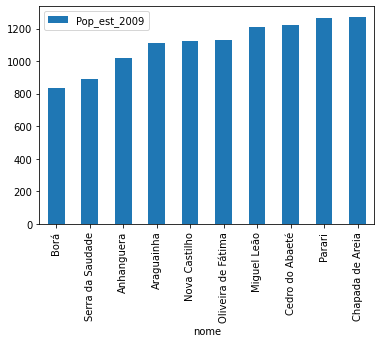

In [220]:
# código para gerar a visualização
top10menos = brasil_df.sort_values(by=['Pop_est_2009'])
top10menos = top10menos.head(n=10)
top10menos.plot.bar(x='nome', y='Pop_est_2009')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

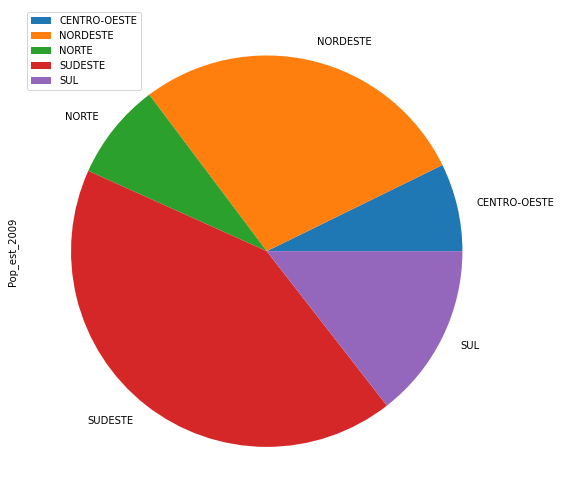

In [221]:
# código para gerar a visualização
popreg = brasil_df[['Pop_est_2009', 'Regiao']].groupby('Regiao').agg('sum')
popreg.plot.pie(y='Pop_est_2009', figsize=(18, 9))
